# The obj of this notebook is resuse the DNN (instead of CNN) to classify the GTRSB dataset

## Import lib 

In [1]:
import numpy as np
import tensorflow as tf
#import pandas as pd
import h5py
from tensorflow import keras
import matplotlib.pyplot as plt
import os, sys
sys.path.append('..') # important to import your own libraries from your workspace
import fidle.libfile as libfile
import fidle.pwk as pwk
print('finished')

finished


# STEP 01: RETREIVE THE DATA, and show some of it:

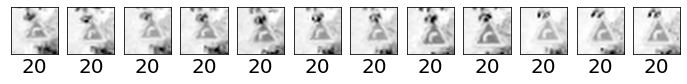

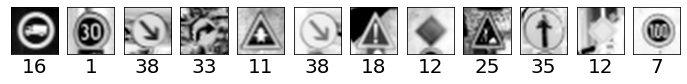

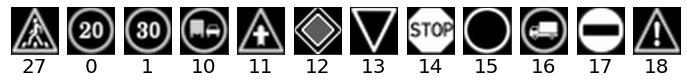

(39209, 24, 24, 1)


In [2]:
filename = '/home/nadourh/Dropbox/PhD_/programming/Initiation_au_Deep_Learning/fidle/GTSRB/data/cooked_data2-L-25x25.h5'
with h5py.File(filename,"r") as f:
    x_train = f['x_train'][:]
    y_train = f['y_train'][:]
    x_test = f['x_test'][:]
    y_test = f['y_test'][:]
    x_meta = f['x_meta'][:]
    y_meta = f['y_meta'][:]
    
pwk.plot_images(x_train, y_train, range(12), columns=12, x_size=1, y_size=1, 
                    colorbar=False, y_pred=None, cm='binary')
pwk.plot_images(x_test, y_test, range(12), columns=12, x_size=1, y_size=1, 
                    colorbar=False, y_pred=None, cm='binary')
pwk.plot_images(x_meta, y_meta, range(12), columns=12, x_size=1, y_size=1, 
                    colorbar=False, y_pred=None, cm='binary')
print(x_train.shape)

# STEP 2 Data Normalisation:

In [3]:
# The images are graysacel, i.e each input is between 0 and 1, thus they are normalized.
print(x_train.max())

1.0


#  STEP 3: build a model:

In [4]:
# get the dimension:
print(x_train.shape)
lx = x_train.shape[1]
ly = x_train.shape[2]
print(lx,ly)

(39209, 24, 24, 1)
24 24


In [5]:
model = keras.models.Sequential()
#model.add( keras.layers.Flatten()) 
# model.add(keras.layers.Flatten(input_shape=(25,25)))
# #model.add(keras.layers.Input(25*25,name="InputLayer"))
model.add(keras.layers.Input((lx,ly,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu',name="Dense1"))
model.add(keras.layers.Dense(500,activation='relu',name="Dense2"))
model.add(keras.layers.Dense(100,activation='relu',name="Dense3"))
#model.add(keras.layers.Dense(500,activation='relu',name="Dense4"))
#model.add(keras.layers.Dense(100,activation='relu',name="Dense5"))
model.add(keras.layers.Dense(43,activation = 'softmax', name="Output"))

model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
Dense1 (Dense)               (None, 100)               57700     
_________________________________________________________________
Dense2 (Dense)               (None, 500)               50500     
_________________________________________________________________
Dense3 (Dense)               (None, 100)               50100     
_________________________________________________________________
Output (Dense)               (None, 43)                4343      
Total params: 162,643
Trainable params: 162,643
Non-trainable params: 0
_________________________________________________________________


# Step 4: train it

In [6]:
history = model.fit(x_train,y_train,batch_size=500,epochs=40,verbose=1,validation_data=(x_test,y_test))

Epoch 1/40
79/79 [==============================] - 2s 25ms/step - loss: 2.9777 - accuracy: 0.2548 - val_loss: 2.3783 - val_accuracy: 0.3713
Epoch 2/40
79/79 [==============================] - 2s 21ms/step - loss: 1.8204 - accuracy: 0.5052 - val_loss: 1.6629 - val_accuracy: 0.5262
Epoch 3/40
79/79 [==============================] - 2s 19ms/step - loss: 1.2622 - accuracy: 0.6481 - val_loss: 1.4278 - val_accuracy: 0.6127
Epoch 4/40
79/79 [==============================] - 2s 23ms/step - loss: 0.9910 - accuracy: 0.7291 - val_loss: 1.2708 - val_accuracy: 0.6622
Epoch 5/40
79/79 [==============================] - 2s 23ms/step - loss: 0.8195 - accuracy: 0.7801 - val_loss: 1.1946 - val_accuracy: 0.6830
Epoch 6/40
79/79 [==============================] - 2s 21ms/step - loss: 0.7252 - accuracy: 0.8088 - val_loss: 1.0633 - val_accuracy: 0.7441
Epoch 7/40
79/79 [==============================] - 2s 26ms/step - loss: 0.6386 - accuracy: 0.8340 - val_loss: 1.0561 - val_accuracy: 0.7550
Epoch 8/40
79

In [16]:
print(history.history['accuracy'])

[0.23147746920585632, 0.49950265884399414, 0.6340125799179077, 0.7235838770866394, 0.767400324344635, 0.8003009557723999, 0.821444034576416, 0.8377668261528015, 0.8608737587928772, 0.8757938146591187, 0.8793389201164246, 0.8880614042282104, 0.890739381313324, 0.8994108438491821, 0.9069346189498901, 0.9189216494560242, 0.9213700890541077, 0.9226962924003601, 0.9274911284446716, 0.9299140572547913, 0.9357800483703613, 0.936774730682373, 0.9379989504814148, 0.9356270432472229, 0.9410339593887329, 0.9420031309127808, 0.9435078501701355, 0.9499349594116211, 0.954882800579071, 0.9566681385040283, 0.9571781754493713, 0.9508531093597412, 0.9624575972557068, 0.9601622223854065, 0.9564640522003174, 0.9584023952484131, 0.9658752083778381, 0.9632482528686523, 0.969471275806427, 0.9639368653297424]


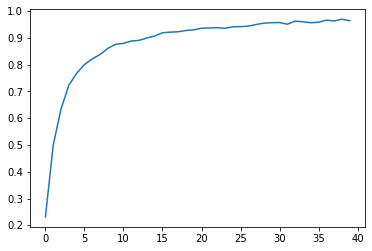

In [17]:
plt.plot(np.array(history.history['accuracy']))

In [18]:
score =  model.evaluate(x_test,y_test,verbose=1)
print('loss and accuracy:', score)


395/395 [==============================] - 4s 9ms/step - loss: 1.0367 - accuracy: 0.8409
loss and accuracy: [1.0367289781570435, 0.8409342765808105]


# Predict:

../fidle/libfile.py:50: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pred != 'None' and pred[img_index] != labels[img_index]:


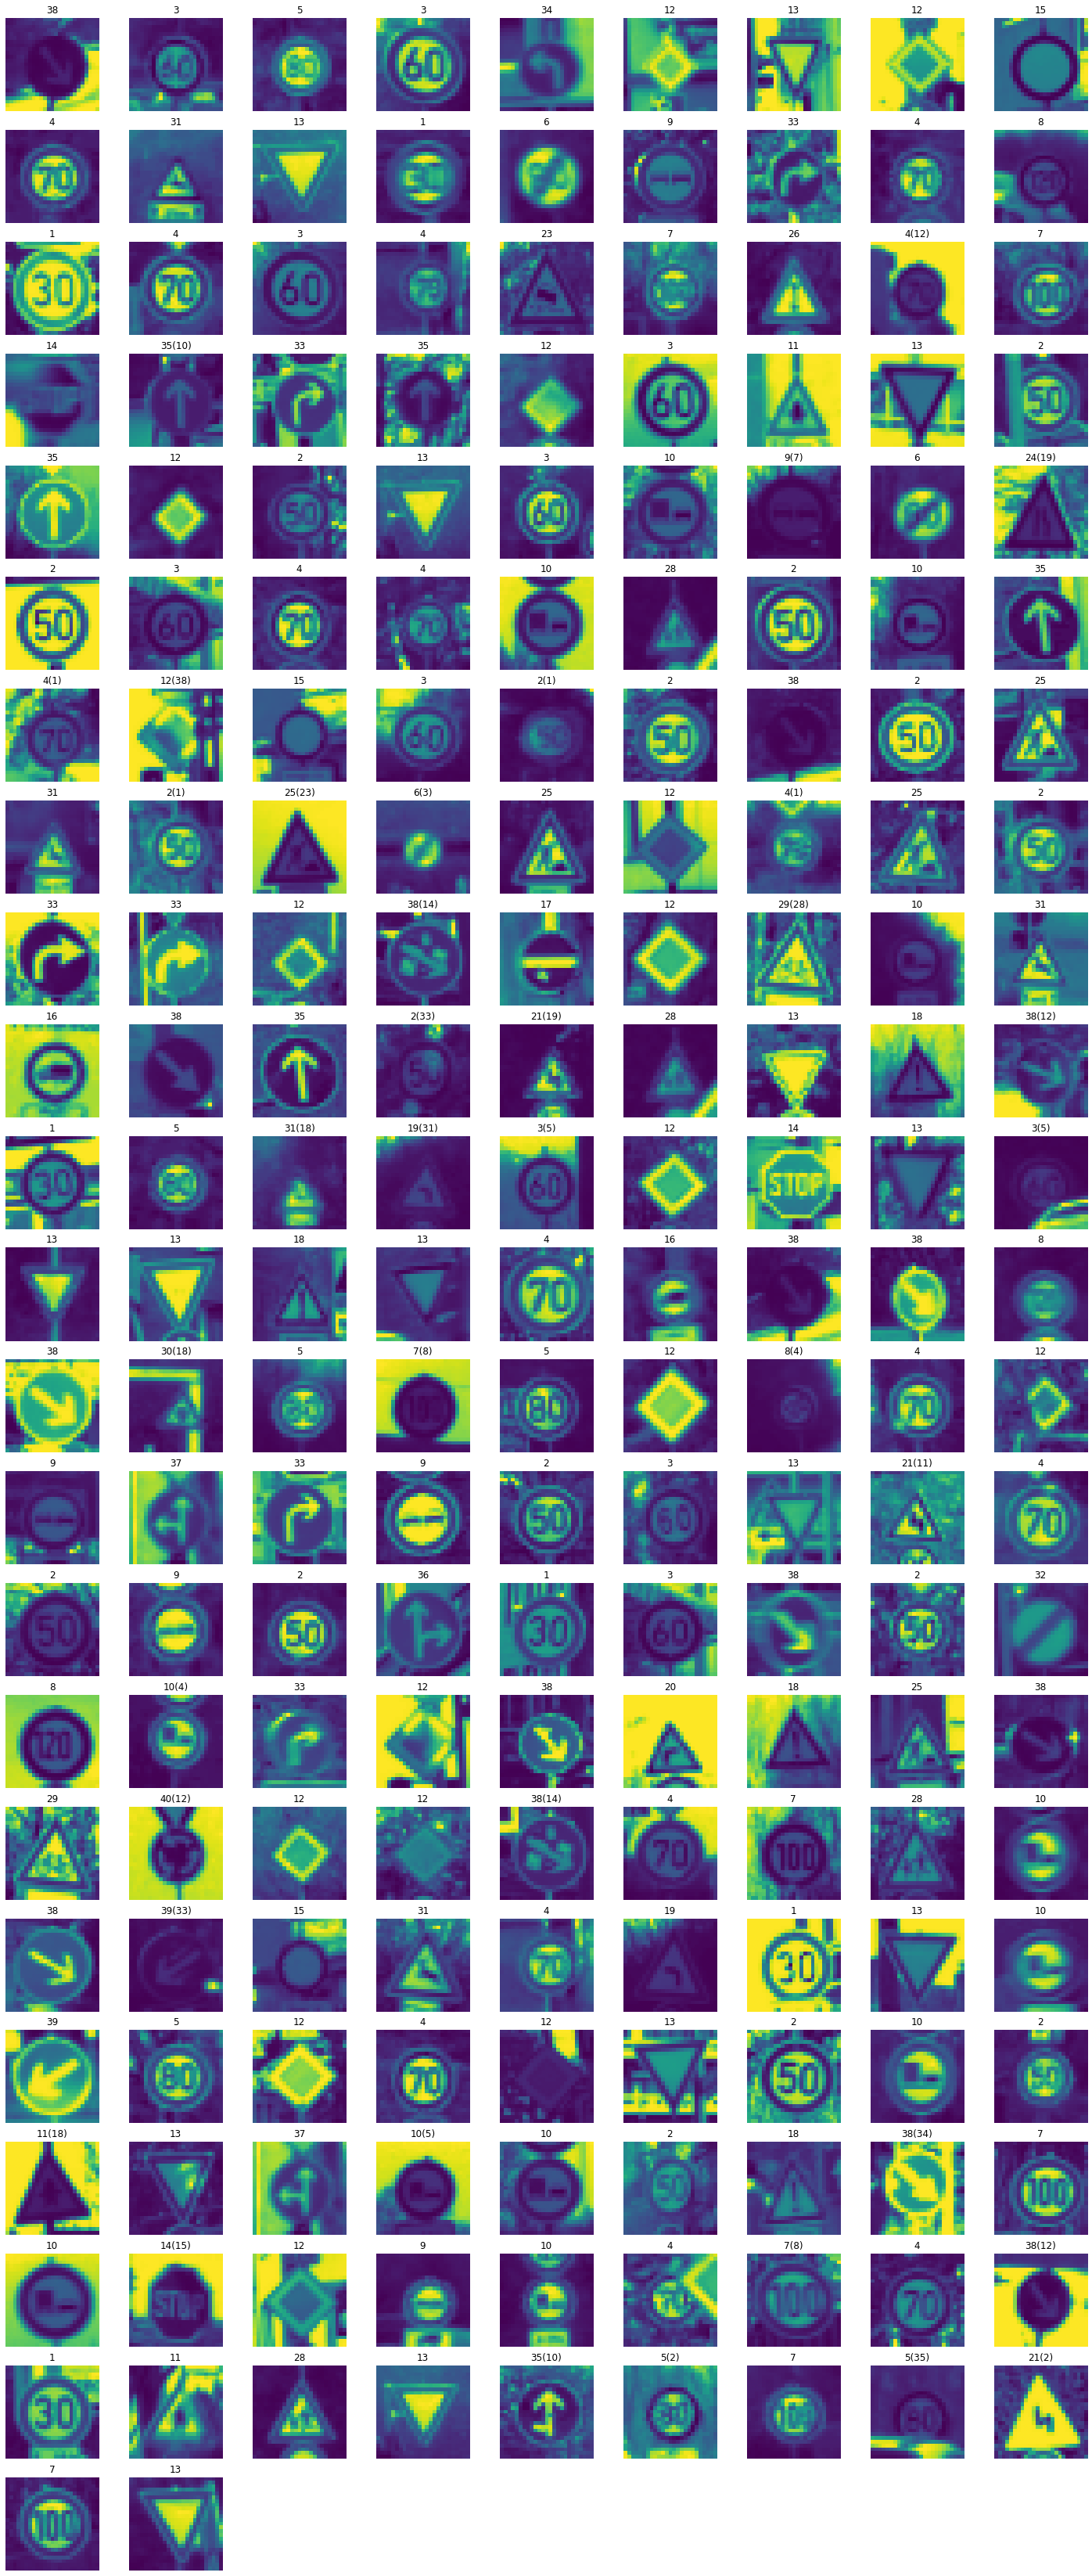

In [19]:
y_sigmoid = model.predict(x_test)
y_pred  = np.argmax(y_sigmoid, axis=-1)
libfile.plot_images_rand(x_test,y_test,subset_im_numb=200,figsize=(25,60),pred=y_pred)